In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [4]:
print("Missing values in each column:\n", data.isnull().sum())

Missing values in each column:
 Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64


no missing values


In [5]:
data.duplicated().sum()

0

no duplicate values


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [7]:
data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Target feature - Bankrupt?')

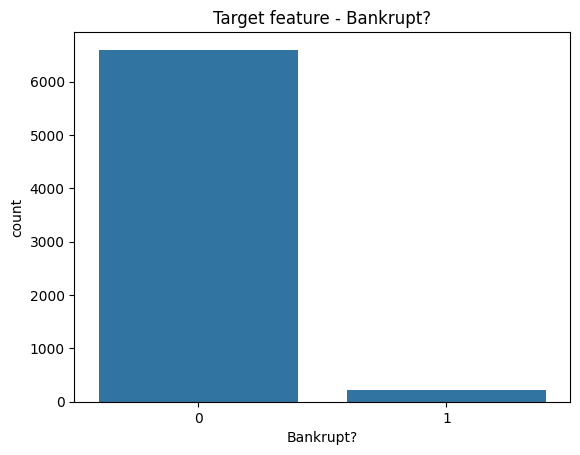

In [8]:
sns.countplot(x=data['Bankrupt?'])
plt.title('Target feature - Bankrupt?')

# Feature Engineering (Example Ratios)

In [9]:
# Step 2: Feature Engineering (Example Ratios)
data['Current_Ratio'] = data[' Current Assets/Total Assets'] / data[' Current Liability to Assets']
data['Debt_to_Equity'] = data[' Total debt/Total net worth']
data['ROA'] = data[' Net Income to Total Assets']
data['ROE'] = data[' Net Income to Stockholder\'s Equity']
data['Interest_Coverage'] = data[' Interest Coverage Ratio (Interest expense to EBIT)']

In [10]:
# Display the updated dataset with new features
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,Current_Ratio,Debt_to_Equity,ROA,ROE,Interest_Coverage
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.290202,0.026601,0.564050,1,0.016469,1.294175,0.021266,0.716845,0.827890,0.564050
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.283846,0.264577,0.570175,1,0.020794,3.202423,0.012502,0.795297,0.839969,0.570175
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.290189,0.026555,0.563706,1,0.016474,6.140923,0.021248,0.774670,0.836774,0.563706
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.281721,0.026697,0.564663,1,0.023982,2.287552,0.009572,0.739555,0.834697,0.564663
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.278514,0.024752,0.575617,1,0.035490,3.252241,0.005150,0.795016,0.839973,0.575617


In [11]:
# Replace infinite values and handle large/small numbers
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data = data.fillna(data.mean())

In [12]:
# Ensure all data is within finite numerical limits
data = data.clip(lower=np.finfo(np.float32).min, upper=np.finfo(np.float32).max, axis=1)

In [13]:
# Step 3: Define Features (X) and Target (y)
# 'Bankrupt' indicating bankruptcy status
target_column = 'Bankrupt?'  
X = data.drop(columns=[target_column])
y = data[target_column]

In [14]:
# Step 4: K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = []
conf_matrices = []
class_reports = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Replace NaNs and infinities in the data
    X_train = np.nan_to_num(X_train)
    X_test = np.nan_to_num(X_test)

    # Train the model
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Store metrics
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    conf_matrices.append(confusion_matrix(y_test, y_pred))
    class_reports.append(classification_report(y_test, y_pred))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

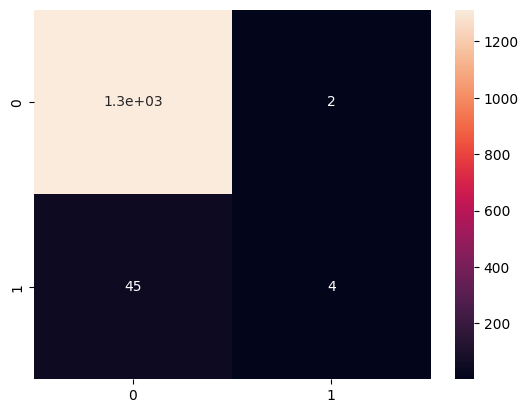

In [15]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)

In [16]:
# Step 5: Print Average Metrics
print("Average Accuracy Score:", np.mean(accuracy_scores))
print("Confusion Matrices (per fold):")
for i, cm in enumerate(conf_matrices):
    print(f"Fold {i+1} Confusion Matrix:\n{cm}\n")

Average Accuracy Score: 0.9699362928506421
Confusion Matrices (per fold):
Fold 1 Confusion Matrix:
[[1311    2]
 [  42    9]]

Fold 2 Confusion Matrix:
[[1317    7]
 [  33    7]]

Fold 3 Confusion Matrix:
[[1324    5]
 [  28    7]]

Fold 4 Confusion Matrix:
[[1314    5]
 [  36    9]]

Fold 5 Confusion Matrix:
[[1312    2]
 [  45    4]]



In [17]:
print("Classification Reports (per fold):")
for i, report in enumerate(class_reports):
    print(f"Fold {i+1} Classification Report:\n{report}\n")

Classification Reports (per fold):
Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1313
           1       0.82      0.18      0.29        51

    accuracy                           0.97      1364
   macro avg       0.89      0.59      0.64      1364
weighted avg       0.96      0.97      0.96      1364


Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1324
           1       0.50      0.17      0.26        40

    accuracy                           0.97      1364
   macro avg       0.74      0.58      0.62      1364
weighted avg       0.96      0.97      0.96      1364


Fold 3 Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1329
           1       0.58      0.20      0.30        35

    accuracy                           0.98      1364
 

In [18]:
# Step 6: Feature Importance Analysis
model.fit(np.nan_to_num(X), y)
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print("Feature Importances:\n", feature_importances)

Feature Importances:
                                       Feature  Importance
29                      Net Value Growth Rate    0.035345
89         Net Income to Stockholder's Equity    0.029666
22   Per Share Net profit before tax (Yuan ¥)    0.023327
98                                        ROE    0.022558
39                       Borrowing dependency    0.020912
..                                        ...         ...
66      Long-term Liability to Current Assets    0.004478
49            Net Worth Turnover Rate (times)    0.004103
14                               Tax rate (A)    0.002087
84                      Liability-Assets Flag    0.000375
93                            Net Income Flag    0.000000

[100 rows x 2 columns]


Model Performance
Average Accuracy: The average accuracy score across all folds is 96.99%. This is a high accuracy, indicating that the model performs well in distinguishing between the classes.



## Confusion Matrices Results: 
In each fold, the confusion matrix shows a pattern where the model is significantly better at classifying the negative class (labeled as "0") than the positive class (labeled as "1"). The model generally has very low false positives (misclassifying negatives as positives) and relatively high false negatives (misclassifying positives as negatives).

False positives (FP) are minimal, with values between 2 and 7, suggesting that the model rarely incorrectly classifies negative samples as positive.

False negatives (FN) are higher, ranging from 28 to 45, which indicates that the model misses a significant portion of the positive samples.


## Classification Reports:

Precision: For class "0" (the majority class), the precision is high (around 0.97 to 0.98), showing that when the model predicts the negative class, it is mostly correct. However, for class "1" (the minority class), precision is low (around 0.5 to 0.67), suggesting that when the model predicts the positive class, it is often wrong.

Recall: The recall for class "0" is near 1 (or perfect), indicating that the model is very good at identifying negatives. However, the recall for class "1" is quite low (around 0.17 to 0.2), meaning the model misses many of the positive cases.

F1-Score: The F1-score for class "0" is high (around 0.98 to 0.99), showing a good balance between precision and recall. For class "1", the F1-score is much lower (around 0.26 to 0.31), indicating a poor balance for identifying positive cases.

The macro average for recall and F1-score suggests an imbalance between the classes, with a lower score for the minority class.



## Feature Importance
The model has identified several key features that contribute to the prediction. Some of the most important features include:
1. Net Value Growth Rate (importance: 0.035345)
2. Net Income to Stockholder's Equity (importance: 0.029666)
3. Per Share Net profit before tax (importance: 0.023327)
4. ROE (importance: 0.022558)
5. Borrowing dependency (importance: 0.020912)

These features seem to have a significant impact on the model's predictions, while others, like Net Income Flag and Liability-Assets Flag, have minimal impact (close to zero importance).